In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns

In [69]:
df = pd.read_csv('Data.csv')

In [70]:
df.head()

,Unnamed: 0,id,external_id,upload_id,athlete,name,distance,moving_time,elapsed_time,total_elevation_gain,...,workout_type,average_speed,max_speed,has_kudoed,gear_id,kilojoules,average_watts,device_watts,max_watts,weighted_average_watts
0,0,282363847,9A54FEB2-B831-404F-911C-AC747346D5CB,319052304.0,{'id': 8583263},Afternoon Ride,9789.1,1898,2057,27.1,...,0.0,5.158,10.3,False,NaN,NaN,NaN,False,NaN,NaN
1,1,289575461,4CDDC3BE-7EEB-4E42-A267-83CCF01030DF,327365800.0,{'id': 8583263},Afternoon Ride,9967.4,1840,2120,33.1,...,0.0,5.417,15.2,False,NaN,NaN,NaN,False,NaN,NaN
2,2,290085349,5FA2E7AC-6255-4598-AC63-CEFF43CB9B2D,327965312.0,{'id': 8583263},Morning Ride,10022.0,1763,1958,27.2,...,0.0,5.685,15.6,False,NaN,NaN,NaN,False,NaN,NaN
3,3,290188116,E070401A-54B9-40FD-BF9E-068E7C5252E5,328079415.0,{'id': 8583263},Lunch Run,5227.2,1806,1815,10.9,...,0.0,2.894,6.2,False,NaN,NaN,NaN,NaN,NaN,NaN
4,4,290272559,4F35938D-5C57-4E13-9D05-137946A8AA5B,328186607.0,{'id': 8583263},Afternoon Ride,9969.3,1859,2017,46.1,...,0.0,5.363,14.9,False,NaN,187.0,100.6,False,NaN,NaN


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 40 columns):
Unnamed: 0                1091 non-null int64
id                        1091 non-null int64
external_id               1090 non-null object
upload_id                 1090 non-null float64
athlete                   1091 non-null object
name                      1091 non-null object
distance                  1091 non-null float64
moving_time               1091 non-null int64
elapsed_time              1091 non-null int64
total_elevation_gain      1091 non-null float64
elev_high                 1083 non-null float64
elev_low                  1083 non-null float64
type                      1091 non-null object
start_date                1091 non-null object
start_date_local          1091 non-null object
timezone                  1091 non-null object
start_latlng              1082 non-null object
end_latlng                1082 non-null object
achievement_count         1091 non-null int64


In [72]:
df['type'].value_counts()

Ride           1036
Run              35
Walk             12
Swim              7
VirtualRide       1
Name: type, dtype: int64

#### This shows that only ride activity are inlarge no so analysing only ride activity

In [73]:
Data_ride = df[df['type']=='Ride']

In [74]:
Data_ride.shape

(1036, 40)

In [75]:
Data_ride.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1036 entries, 0 to 1090
Data columns (total 40 columns):
Unnamed: 0                1036 non-null int64
id                        1036 non-null int64
external_id               1036 non-null object
upload_id                 1036 non-null float64
athlete                   1036 non-null object
name                      1036 non-null object
distance                  1036 non-null float64
moving_time               1036 non-null int64
elapsed_time              1036 non-null int64
total_elevation_gain      1036 non-null float64
elev_high                 1036 non-null float64
elev_low                  1036 non-null float64
type                      1036 non-null object
start_date                1036 non-null object
start_date_local          1036 non-null object
timezone                  1036 non-null object
start_latlng              1036 non-null object
end_latlng                1036 non-null object
achievement_count         1036 non-null int64


In [76]:
Data_ride.drop(columns=['Unnamed: 0','id', 'external_id', 'upload_id','name', 'athlete','map', 'trainer', 'commute', 'manual', 'private',
       'flagged','device_watts','has_kudoed','max_watts',
       'weighted_average_watts','gear_id' ,'type','workout_type','photo_count'],axis=1,inplace=True)

In [77]:
Data_ride.head(2)

,distance,moving_time,elapsed_time,total_elevation_gain,elev_high,elev_low,start_date,start_date_local,timezone,start_latlng,end_latlng,achievement_count,kudos_count,comment_count,athlete_count,total_photo_count,average_speed,max_speed,kilojoules,average_watts
0,9789.1,1898,2057,27.1,61.3,30.4,2015-04-08 07:12:04+00:00,2015-04-08 16:42:04+00:00,(GMT+09:30) Australia/Adelaide,"[-34.94, 138.6]","[-34.93, 138.6]",0,0,0,1,0,5.158,10.3,NaN,NaN
1,9967.4,1840,2120,33.1,61.0,30.4,2015-04-21 07:46:30+00:00,2015-04-21 17:16:30+00:00,(GMT+09:30) Australia/Adelaide,"[-34.93, 138.6]","[-34.88, 138.63]",0,0,0,1,0,5.417,15.2,NaN,NaN


In [78]:
Data_ride.isna().sum()

distance                0
moving_time             0
elapsed_time            0
total_elevation_gain    0
elev_high               0
elev_low                0
start_date              0
start_date_local        0
timezone                0
start_latlng            0
end_latlng              0
achievement_count       0
kudos_count             0
comment_count           0
athlete_count           0
total_photo_count       0
average_speed           0
max_speed               0
kilojoules              3
average_watts           3
dtype: int64

In [79]:
Data_ride = Data_ride.fillna(Data_ride.mean())


In [80]:
Data_ride.describe()

,distance,moving_time,elapsed_time,total_elevation_gain,elev_high,elev_low,achievement_count,kudos_count,comment_count,athlete_count,total_photo_count,average_speed,max_speed,kilojoules,average_watts
count,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000,1036.000000
mean,18523.248069,3213.654440,4865.534749,210.462934,192.280309,30.921042,6.383205,8.470077,0.613900,1.364865,0.397683,5.869324,12.591795,352.074347,100.662246
std,19270.626010,3431.533545,7161.073076,379.083973,262.566377,39.336684,15.079079,8.857873,1.741663,1.223001,1.118209,0.640426,2.962030,434.907127,22.919986
min,0.000000,0.000000,0.000000,0.000000,-500.000000,-500.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9682.125000,1541.000000,1766.750000,29.000000,56.000000,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.544000,10.400000,135.275000,83.075000
50%,10070.400000,1724.000000,1986.000000,43.750000,74.300000,30.000000,1.000000,7.000000,0.000000,1.000000,0.000000,5.880000,11.700000,168.600000,101.250000
75%,20030.875000,3297.500000,5350.250000,99.250000,189.000000,38.450000,4.000000,12.000000,0.000000,1.000000,0.000000,6.225000,14.800000,286.600000,118.200000
max,176743.000000,29307.000000,46574.000000,3593.000000,2583.800000,400.000000,134.000000,40.000000,17.000000,23.000000,7.000000,8.022000,36.200000,3608.500000,161.600000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B198763898>,
      dtype=object)

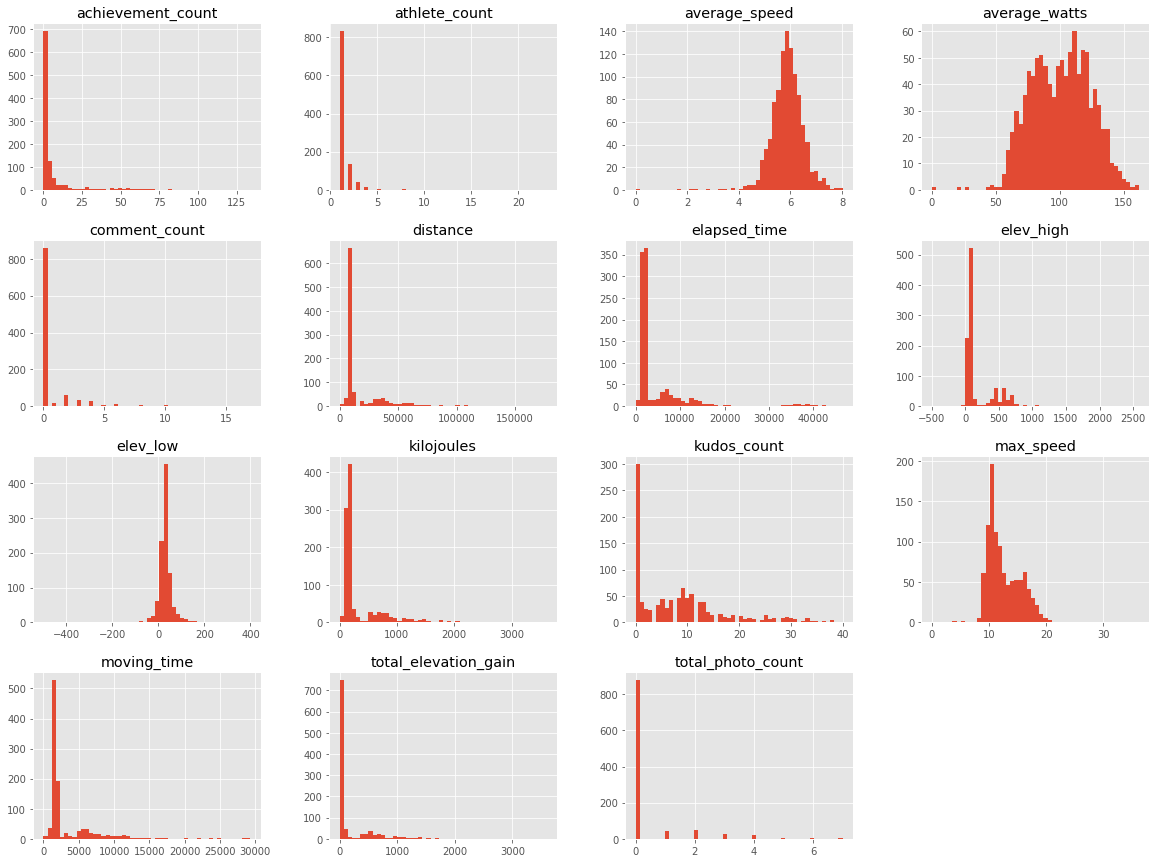

In [81]:
Data_ride.hist(bins=50,figsize=(20,15))

In [82]:
Data_ride['start_date']= Data_ride['start_date'].apply(lambda x: datetime.strptime(x[0:19],'%Y-%m-%d %X'))

In [83]:
Data_ride['start_date_local']= Data_ride['start_date_local'].apply(lambda x: datetime.strptime(x[0:19],'%Y-%m-%d %X'))

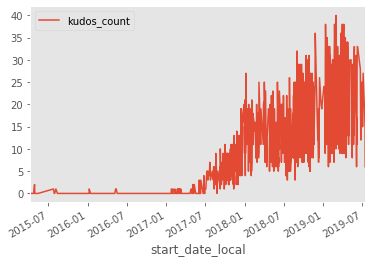

In [84]:
pd.pivot_table(Data_ride,values='kudos_count',index='start_date_local',aggfunc=np.mean).sort_index().plot()
plt.grid()

In [86]:
Data_ride = Data_ride[Data_ride['start_date_local'] > datetime(2017,7,1)]

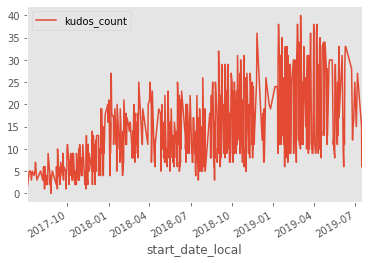

In [88]:
pd.pivot_table(Data_ride,values='kudos_count',index='start_date_local',aggfunc=np.mean).sort_index().plot()
plt.grid()

# Feature Engineering, Modeling and Selection

In [89]:
Data_ride.drop(columns=['start_date','start_date_local','timezone','start_latlng','end_latlng'],axis=1,inplace=True)

In [90]:
Data_ride.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 358 to 1090
Data columns (total 15 columns):
distance                699 non-null float64
moving_time             699 non-null int64
elapsed_time            699 non-null int64
total_elevation_gain    699 non-null float64
elev_high               699 non-null float64
elev_low                699 non-null float64
achievement_count       699 non-null int64
kudos_count             699 non-null int64
comment_count           699 non-null int64
athlete_count           699 non-null int64
total_photo_count       699 non-null int64
average_speed           699 non-null float64
max_speed               699 non-null float64
kilojoules              699 non-null float64
average_watts           699 non-null float64
dtypes: float64(8), int64(7)
memory usage: 87.4 KB


In [91]:
from sklearn.model_selection import train_test_split
X = Data_ride.drop('kudos_count',axis=1).values
y = Data_ride['kudos_count'].values

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [93]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

### KNeighborsClassifier

In [94]:
from sklearn.model_selection import train_test_split
from sklearn . metrics import classification_report
from sklearn . neighbors import KNeighborsClassifier
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

In [95]:
k_range=range(1,10)
scores_list=[]

In [96]:
for k in k_range:
        knn=KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_std,y_train)
        y_pred=knn.predict(X_test_std)
        metric=metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metric)

In [97]:
print ( classification_report ( y_pred , y_test ))

             precision    recall  f1-score   support

          1       0.00      0.00      0.00         1
          2       0.25      0.10      0.14        10
          3       0.00      0.00      0.00        10
          4       0.00      0.00      0.00         7
          5       0.18      0.20      0.19        10
          6       0.00      0.00      0.00         1
          7       0.10      0.14      0.12         7
          8       0.00      0.00      0.00         9
          9       0.36      0.22      0.27        23
         10       0.00      0.00      0.00         8
         11       0.57      0.21      0.31        19
         12       0.00      0.00      0.00         0
         13       0.00      0.00      0.00         1
         14       0.33      0.12      0.18         8
         15       0.00      0.00      0.00         0
         16       0.00      0.00      0.00         3
         17       0.00      0.00      0.00         0
         18       0.00      0.00      0.00   

E:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


<function matplotlib.pyplot.show(*args, **kw)>

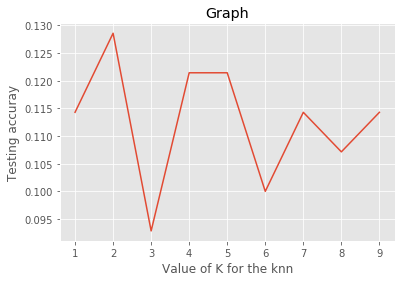

In [98]:
plt.plot(k_range,scores_list)
plt.title('Graph')
plt.xlabel('Value of K for the knn')
plt.ylabel('Testing accuray')
plt.show

In [99]:
training_score = cross_val_score(knn, X_train_std, y_train)
print("KNeighbourClassifier has a training score of", round(training_score.mean()*100, 2),'%')

KNeighbourClassifier has a training score of 10.34 %


E:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


In [100]:
print('KNeighbourClassifier has accuracy of',round(metrics.accuracy_score(y_test,y_pred)*100,2) ,'%')

KNeighbourClassifier has accuracy of 11.43 %


In [101]:
  train_sizes, train_scores, test_scores= learning_curve(knn, X_train_std, y_train, n_jobs=10,
                       train_sizes=np.linspace(.1, 1.0, 5))

E:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


In [102]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


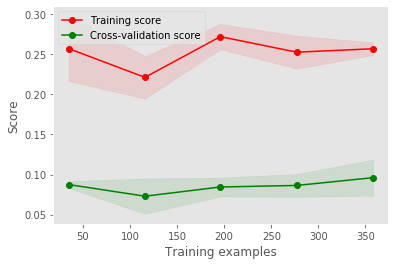

In [103]:
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
plt.legend(loc="best")
plt.grid()

### Linear Regression

In [104]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_std,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [105]:
from sklearn.metrics import mean_squared_error
kudos_predictions_train = lr.predict(X_train_std)
kudos_predictions_test = lr.predict(X_test_std)
train_mse_lr = mean_squared_error(y_train,kudos_predictions_train)
train_rmse_lr = np.sqrt(train_mse_lr)


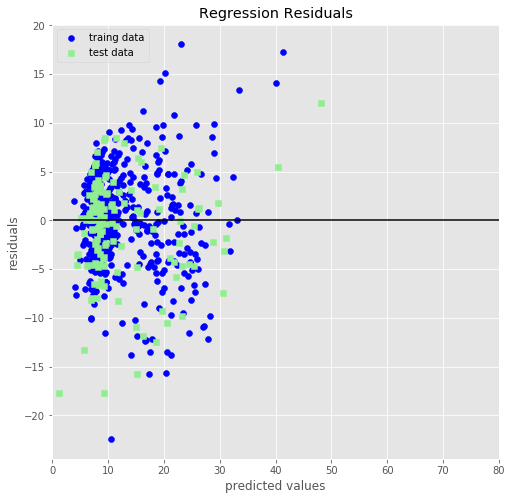

In [106]:
fig, ax = plt.subplots(figsize=(8,8))
plt.style.use('ggplot')
plt.scatter(kudos_predictions_train,kudos_predictions_train-y_train,c='blue',marker='o',label='traing data')
plt.scatter(kudos_predictions_test,kudos_predictions_test-y_test,c='lightgreen',marker='s',label='test data')
plt.title('Regression Residuals')
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=0,xmax=80)
plt.xlim([0,80])
plt.show()

In [107]:
train_size, train_score, test_score= learning_curve(lr, X_train_std, y_train, n_jobs=10,
                       train_sizes=np.linspace(.1, 1.0, 5))

In [108]:
train_score_mean = np.mean(train_score, axis=1)
test_score_mean = np.mean(test_score, axis=1)
train_score_std = np.std(train_score, axis=1)
test_score_std = np.std(test_score, axis=1)


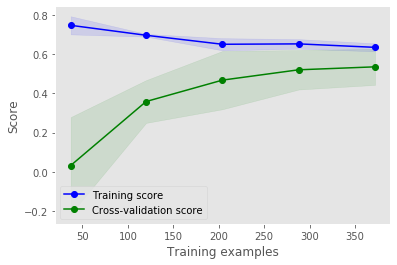

In [109]:
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.plot(train_size, train_score_mean, 'o-', color="b",label="Training score")
plt.fill_between(train_size, train_score_mean - train_score_std,
                         train_score_mean + train_score_std, alpha=0.1,
                         color="b")
plt.plot(train_size, test_score_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, test_score_mean - test_score_std,
                         test_score_mean + test_score_std, alpha=0.1,
                         color="g")
plt.legend(loc="best")
plt.grid()

In [112]:
labels = Data_ride.drop('kudos_count',axis=1).columns
importance = lr.coef_
indices = np.argsort(importance)[::-1]
for feature in range(X_train.shape[1]):
    print(f'{feature} - {labels[indices[feature]]} {importance[indices[feature]]:.2f}')

0 - kilojoules 7.98
1 - max_speed 3.43
2 - distance 2.83
3 - elev_high 1.03
4 - total_photo_count 0.25
5 - elev_low -0.08
6 - comment_count -0.41
7 - average_watts -0.45
8 - athlete_count -0.58
9 - elapsed_time -0.80
10 - moving_time -1.17
11 - average_speed -1.47
12 - total_elevation_gain -4.02
13 - achievement_count -4.20


(-1, 14)

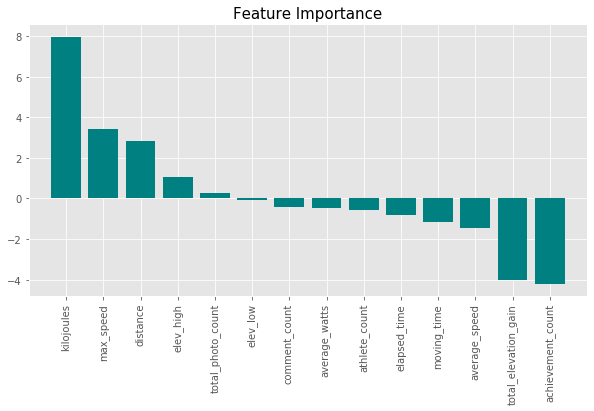

In [126]:

fig, ax = plt.subplots(figsize=(10,5))
plt.title('Feature Importance',fontsize=15)
plt.bar(range(X_train.shape[1]),importance[indices],color='teal')
plt.xticks(range(X_train.shape[1]),labels[indices],rotation=90)
plt.xlim([-1,X_train.shape[1]])


In [130]:
from sklearn.cluster import KMeans

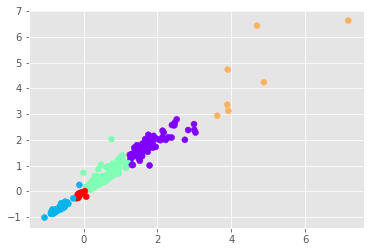

In [136]:
cluster = KMeans ( n_clusters =5 , random_state =0)
cluster . fit_predict (X_train )
plt . scatter (X_train_std[: ,0] , X_train_std[: ,1] , c = cluster.labels_ , cmap ='rainbow')
plt . show ()